<a href="https://colab.research.google.com/github/44REAM/CEB-image_processing/blob/main/image1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/44REAM/CEB-image_processing.git
%cd /content/CEB-image_processing


Cloning into 'CEB-image_processing'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 42 (delta 14), reused 15 (delta 4), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/CEB-image_processing


In [2]:
import numpy as np
import cv2

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ct_image = cv2.imread('data/ct.jpeg')
print(f"image shape: {ct_image.shape}")

ct_image = ct_image[:,:,0]

image shape: (630, 522, 3)


# Basic image operation

## Resize image

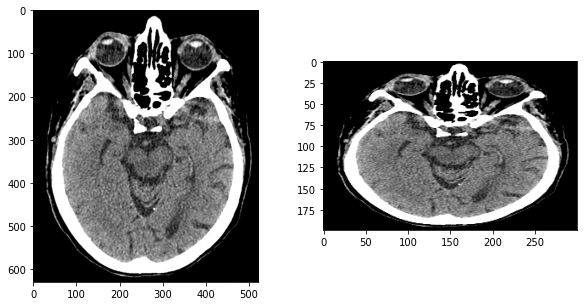

In [4]:
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resized_down = cv2.resize(ct_image, down_points, interpolation= cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(resized_down, cmap = 'gray')

## Image interpolation

Image interpolation is the process to estimate values at unknown location using known data. 
Example: The simplest interpolation algorithm is nearest neighbor algorithm. When we resize our original (size 500 × 500 pixel) image to 750 × 750 pixel, we create a grid of 750 × 750 pixel and assign the intensity to the point by select the most nearest point from original image.

You can check interpolation method in openCV by the link below

https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

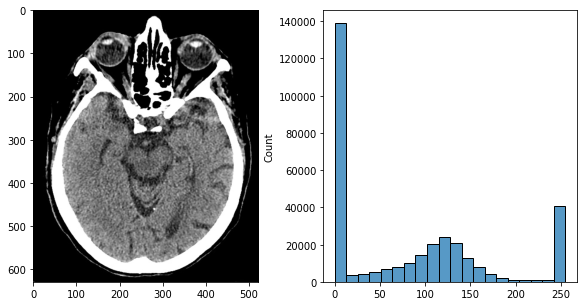

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))


axes[0].imshow(ct_image, cmap = 'gray')
sns.histplot(ct_image.ravel(), bins=20, ax = axes[1])

# Thresholding

## Global thresholding

### manually select threshold

In some case you may want to manually select the threshold. For example in CT lung image, you may know the specific HU threshold that you want from domain knowledge.

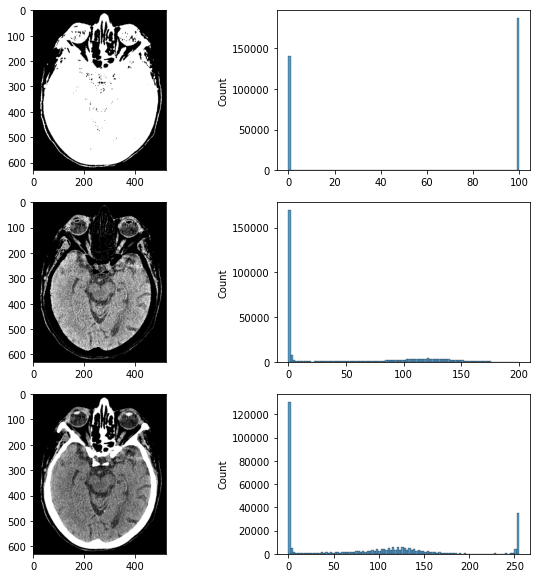

In [6]:
# https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576
_, ct_image_thres_binary = cv2.threshold(ct_image, 20, 100, cv2.THRESH_BINARY)
_, ct_image_thres_zero = cv2.threshold(ct_image, 200, None, cv2.THRESH_TOZERO_INV)


fig, axes = plt.subplots(3, 2, figsize = (10,10))

axes[0][0].imshow(ct_image_thres_binary, cmap = 'gray')
sns.histplot(ct_image_thres_binary.ravel(), bins=100, ax = axes[0][1])

axes[1][0].imshow(ct_image_thres_zero, cmap = 'gray')
sns.histplot(ct_image_thres_zero.ravel(), bins=100, ax = axes[1][1])

axes[2][0].imshow(ct_image, cmap = 'gray')
sns.histplot(ct_image.ravel(), bins=100, ax = axes[2][1])


### Otsu's method

Otsu's method provide a way to select threshold automatically.

1. Otsu's method try to find the threshold τ which maximize variance between groups.
2. Find global mean

3. Find group probability

$$G_1=\sum^\tau_{i=0}P(i)$$
$$G_2 = \sum^{L-1}_{i=\tau+1}P(i)$$

4. Find groups mean. For each group, we try to find the center intensity ($\mu_j$) of the groups by weighted average the the intensity $i$ by its probability $P(i)$ which $P(i)$ is probability that intensity $i$ in the image.

$$\mu_1 = \frac{\sum^\tau_{i=0}iP(i)}{G_1}$$
$$\mu_2 = \frac{\sum^{L-1}_{i=\tau+1}iP(i)}{G_2}$$

5. We find the between class variance by 

$$σ_B^2 = G_1(\mu_1 - \mu_g) + G_2(\mu_2 - \mu_g)$$

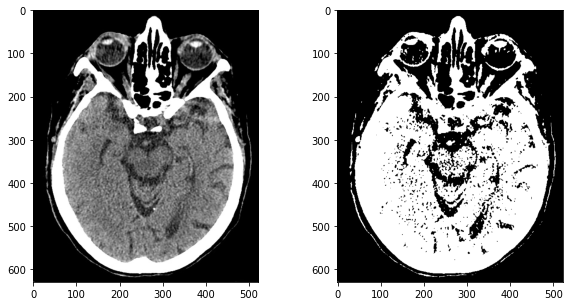

In [9]:
otsu_thres, ct_image_otsu = cv2.threshold(ct_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(ct_image_otsu, cmap = 'gray')

When Otsu's method fail
- small objects size compare to background
- large intra-class then inter-class variance

## Adaptive threshold

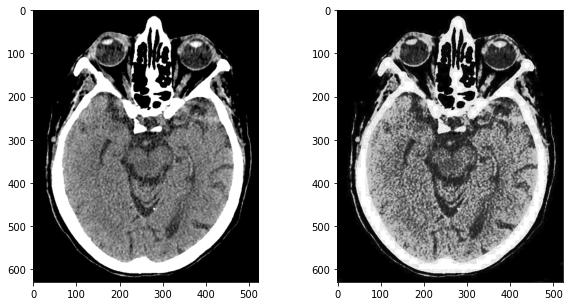

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

ct_equ = cv2.equalizeHist(ct_image)
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(ct_equ, cmap = 'gray')


In [ ]:
def threshold(image, lower_bound = None, upper_bound = None, new_intensity = 0):
    assert lower_bound is not None or upper_bound is not None
    if lower_bound is not None:
        
    ct_image[(ct_image > lower_bound) & (ct_image < upper_bound)] = new_intensity

In [ ]:
ct_image[(ct_image > 20) & (ct_image < 200)] = 0